In [5]:
import pandas as pd #라이브러리 호출

In [6]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data' #Data URL
# data_url = './housing.data' #Data URL
df_data = pd.read_csv(data_url, sep='\s+', header = None) #csv 타입 데이터 로드, separate는 빈공간으로 지정하고, Column은 없음

In [7]:
df_data.head() #처음 다섯줄 출력

0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2

In [8]:
df_data.columns = [
    'CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO' ,'B', 'LSTAT', 'MEDV'] 
# Column Header 이름 지정
df_data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

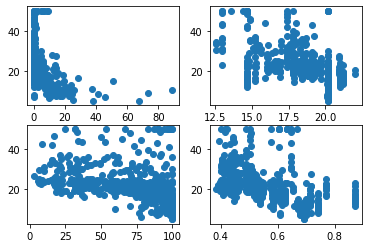

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = []
for i in range(1,5):
    ax.append(fig.add_subplot(2,2,i))
ax[0].scatter(df_data["CRIM"], df_data["MEDV"])
ax[1].scatter(df_data["PTRATIO"], df_data["MEDV"])
ax[2].scatter(df_data["AGE"], df_data["MEDV"])
ax[3].scatter(df_data["NOX"], df_data["MEDV"])
plt.show()

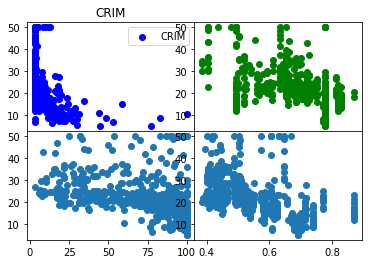

In [13]:
fig = plt.figure()
ax = []
for i in range(1,5):
    ax.append(fig.add_subplot(2,2,i))
ax[0].scatter(df_data["CRIM"], df_data["MEDV"], color="b", label="CRIM")
ax[1].scatter(df_data["PTRATIO"], df_data["MEDV"], color="g")
ax[2].scatter(df_data["AGE"], df_data["MEDV"])
ax[3].scatter(df_data["NOX"], df_data["MEDV"])
plt.subplots_adjust(wspace=0, hspace=0)
ax[0].legend()
ax[0].set_title("CRIM")
plt.show()

<AxesSubplot:>

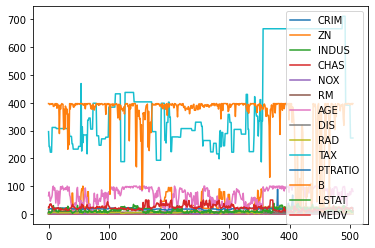

In [14]:
df_data.plot()

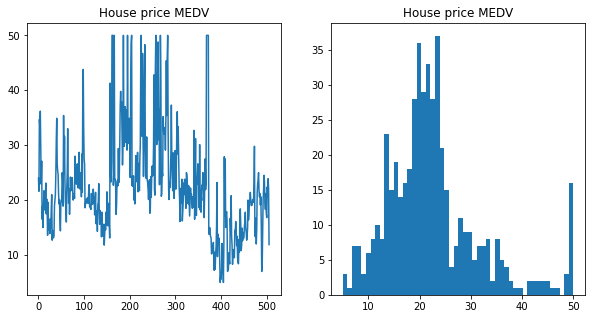

In [15]:
fig = plt.figure()
fig.set_size_inches(10,5)
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)
ax_1.plot(df_data["MEDV"])
ax_2.hist(df_data["MEDV"], bins=50)
ax_1.set_title("House price MEDV")
ax_2.set_title("House price MEDV")
plt.show()

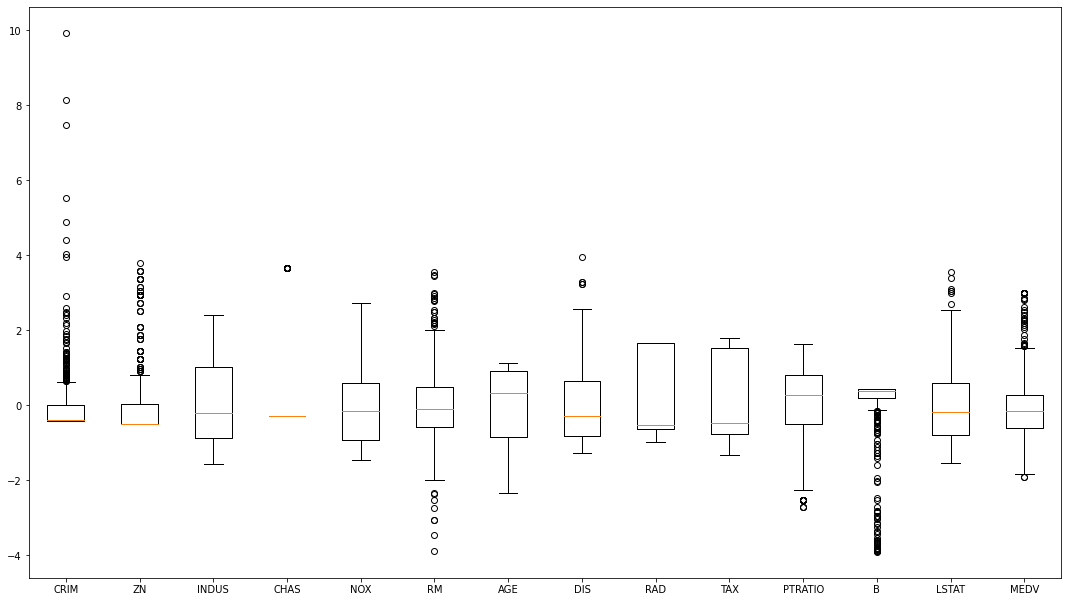

In [17]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scale_data = std_scaler.fit_transform(df_data)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(scale_data, labels=df_data.columns)
fig.set_size_inches(18.5, 10.5)
plt.show()

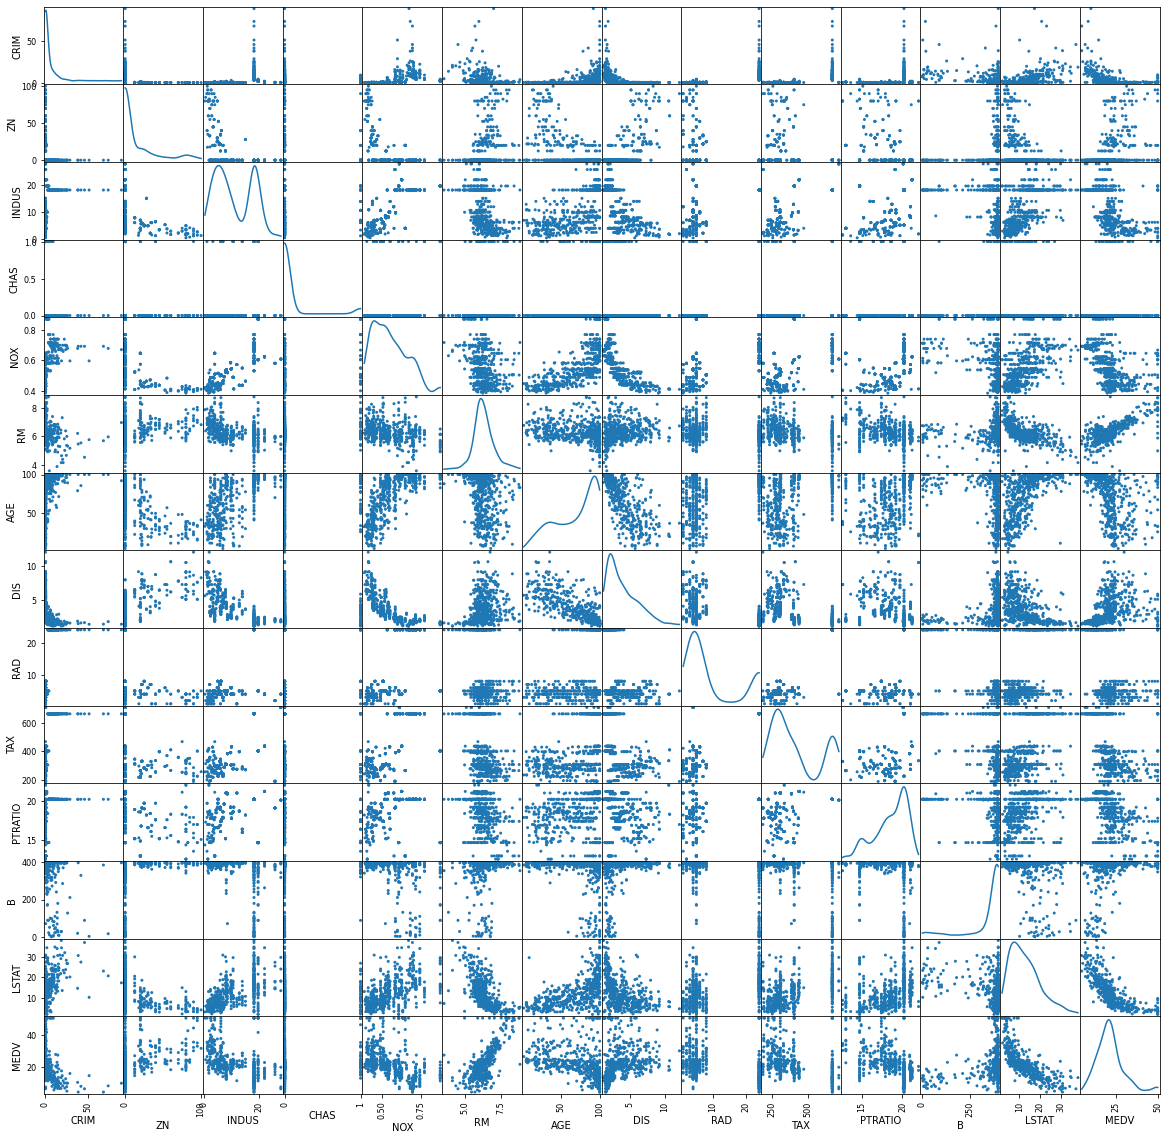

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_data, diagonal="kde", alpha=1, figsize=(20,20))
plt.show()

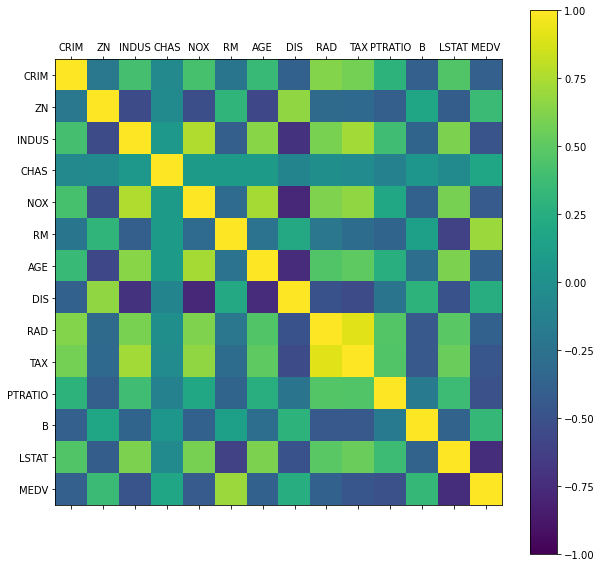

In [23]:
import numpy as np

corr_data = df_data.corr(method='pearson')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(corr_data, vmin=-1, vmax=1, interpolation='nearest')
fig.colorbar(cax)
fig.set_size_inches(10,10)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_data.columns)
ax.set_yticklabels(df_data.columns)
plt.show()